In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy

In [3]:
def model0(k):
    return (200./(k+10.))**5

In [4]:
def gen_2Dgauss(N, Lx, Ly, model):

    field = np.zeros((N,N), dtype = complex)

    dkx = (2.*np.pi)/Lx
    dky = (2.*np.pi)/Ly

    for ix in range(0, N):
        if ix <= N/2:
            kx = ix*dkx
        else:
            kx = (ix-N)*dkx
    
        for iy in range(0, N):
            if iy <= N/2:
                ky = iy*dky
            else:
                ky = (iy-N)*dky
        
            kval = (kx**2 + ky**2)**0.5
        
            field[ix, iy] = np.random.normal(0.,(model(kval)/2.)**0.5) + np.random.normal(0.,(model(kval)/2.)**0.5)*1j

    # Now we have to set \delta(-k) = \delta^*(k)
    # Note that \delta_n = \delta_{n+N} and therefore we have to set \delta(2dk,-dk) = \delta^*(2dk,dk)
    for ix in range(N/2+1, N):
    
        jx = N-ix
    
        field[ix, 0] = field[jx, 0].real - field[jx, 0].imag*1j
        field[0, ix] = field[0, jx].real - field[0, jx].imag*1j

        for iy in range(1, N):
        
            jy = N-iy
        
            field[ix, iy] = field[jx, jy].real - field[jx, jy].imag*1j

    if N % 2 == 0:
        for ix in range(1, N/2):
            jx = N-ix
            
            field[N/2,ix] = field[N/2,jx].real - field[N/2,jx].imag*1j


        kval = dkx*N/2
        # Set the complex part to zero if there is no partner (note the factor of 2 difference)
        field[0,N/2] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;
        field[N/2,0] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;
        
        kval = (dkx*N/2)*(2**0.5)
        
        field[N/2,N/2] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;

    field[0,0] = 0. + 0.*1j
    
    return field

In [5]:
def calc_power(N, field, dk, Nshot, Lx, Ly, norm):
    
    dkx = (2.*np.pi)/Lx
    dky = (2.*np.pi)/Ly
    
    V= Lx*Ly
    
    power  = np.zeros(N, dtype=float)
    Nmodes = np.zeros(N, dtype=float)
    
    for ix in range(0,N):
        if ix <= N/2:
            kx = ix*dkx
        else:
            kx = (ix-N)*dkx
            
        for iy in range(0,N):
            if iy <= N/2:
                ky = iy*dky
            else:
                ky = (iy-N)*dky
                
            kval = (kx**2 + ky**2)**0.5
            
            if kval>0:
                power[int(kval/dk)] = power[int(kval/dk)] + field[ix][iy].real**2 + field[ix][iy].imag**2 - Nshot
                Nmodes[int(kval/dk)]= Nmodes[int(kval/dk)] + 1

                
    iNonZeros = np.where(Nmodes != 0)
    iZeros = np.where(Nmodes ==0)
    power[iNonZeros] = power[iNonZeros]/Nmodes[iNonZeros]
    
    k = np.linspace( dkx/2., (N-1)*dkx + dkx/2., num=N)
    k[iZeros] = 0
    
    return V*np.trim_zeros(power)/norm, np.trim_zeros(k)

In [6]:
def main():
    
    Lx = 1.
    Ly = 1.
    V = Lx*Ly
    N = 101
    dk = (2.*np.pi)/Lx
    
    Normaliz = 1.0
    
    #-----------------------------------------#
    #-- Generate Gaussian random field -------#
    #-----------------------------------------#
    
    kspace_field = gen_2Dgauss(N, Lx, Ly, model0)
    
    config_field = np.fft.ifft2(kspace_field)*kspace_field.size**0.5

    
    power, k = calc_power(N, kspace_field, dk, 0.0 , Lx, Ly, Normaliz)

    pl.title('Power Spectrum')
    pl.xlabel('k')
    pl.ylabel('Power Spectrum')
    pl.xscale('log', nonposy='clip')
    pl.yscale('log', nonposy='clip')
    pl.plot(k,power,'b')
    pl.plot(k,model0(k),'r')
    #pl.show
    
    
    
    fig, ax = pl.subplots()
    im = ax.imshow(config_field.real, cmap=pl.cm.jet)
    fig.colorbar(im, ax=ax)
    pl.title("field.real, config_space")
    #pl.show()
    
    fig, ax = pl.subplots()
    im = ax.imshow(config_field.imag, cmap=pl.cm.jet)
    fig.colorbar(im, ax=ax)
    pl.title("field.imag, config_space")
    #pl.show()

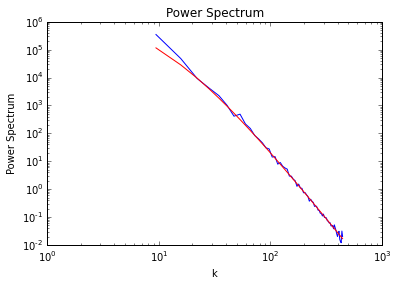

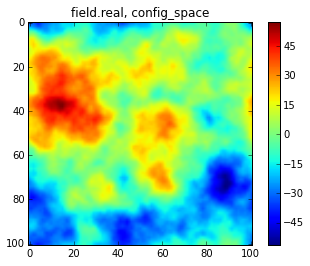

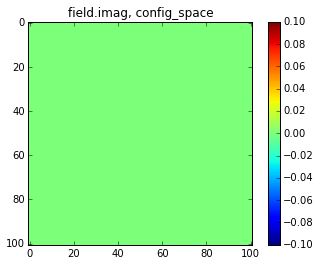

In [7]:

#if __name__ == '__main__':
#    main()

main()

#Matrix de Covarianza

Hacer cien realizaciones del espectro de potencias.

Los coeficinetes de la matriz $C_{ij}$ se calculan como:

$ C_{ij} = \frac{1}{N-1}\sum_{\alpha \beta}^{N} \left( P_\alpha(k_i) - \bar P(k_i) \right)\cdot \left( P_\beta(k_j) - \bar P(k_j) \right)$



In [8]:
PowerSpect = []

In [9]:
Lx = 1.
Ly = 1.
V = Lx*Ly
N = 101
dk = (2.*np.pi)/Lx
Normaliz = 1.0

In [15]:
N = 100


PowerSpect = []
for i in range(N):
    kspace_field = gen_2Dgauss(N, Lx, Ly, model0)    
    config_field = np.fft.ifft2(kspace_field)*kspace_field.size**0.5
    power, k = calc_power(N, kspace_field, dk, 0.0 , Lx, Ly, Normaliz)
    PowerSpect.append(power)
PowerSpect = np.array(PowerSpect)

PowerAverage = np.zeros(70)

for i in range(70):
    PowerAverage[i] =  average(PowerSpect[:,i])

(8, 700)

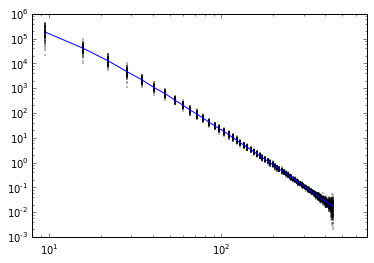

In [46]:
for i in range(N):
    scatter(k[:],PowerSpect[i,:], s=0.1)
plot(k,PowerAverage)
xscale('log')
yscale('log')
xlim(8,700)

$ C_{ij} = \frac{1}{N-1}\sum_{n}^{N} \left( P_n(k_i) - \bar P(k_i) \right)\cdot \left( P_n(k_j) - \bar P(k_j) \right)$


In [47]:
CovarianceMatrix = np.zeros([70,70])
"""
for i in range(70):
    print i
    for j in range(70):
        aux = 0
        for a in range(N):
            for b in range(N):
                aux += (PowerSpect[a][i]-PowerAverage[i])*(PowerSpect[b][j]-PowerAverage[j])
        CovarianceMatrix[i][j]= 1./(N-1)*aux
"""         

for i in range(70):
    for j in range(70):
        aux = 0
        for n in range(N):
            aux += ( PowerSpect[n][i]-PowerAverage[i])*(PowerSpect[n][j]-PowerAverage[j])
            
        CovarianceMatrix[i][j]= aux/(N-1)


In [48]:
Cinv = linalg.inv(CovarianceMatrix)

<matplotlib.colorbar.Colorbar instance at 0x108ec0fc8>

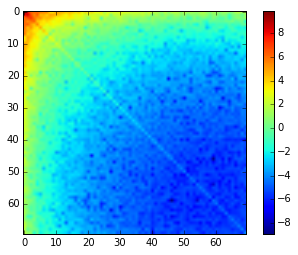

In [49]:
imshow(log10(abs(CovarianceMatrix)))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x108f29b48>

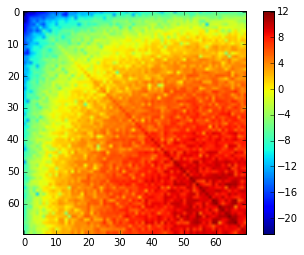

In [50]:
imshow(log(abs(Cinv)))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x108fc3170>

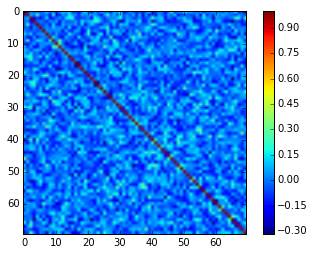

In [51]:
gamma = np.zeros([70,70])
for i in range(70):
    for j in range(70):
        gamma[i,j] = CovarianceMatrix[i,j]/(CovarianceMatrix[i,i]*CovarianceMatrix[j,j])**0.5
imshow(gamma)
colorbar()

(8, 700)

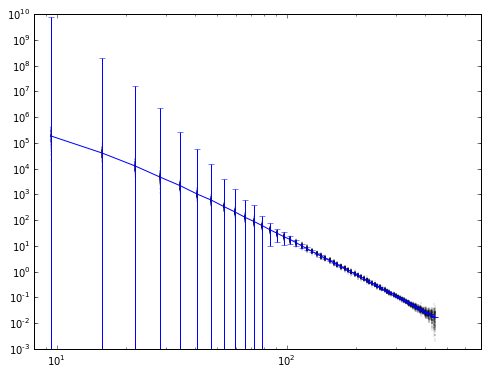

In [66]:
fir = figure(figsize=(8,6))
for i in range(N):
    scatter(k[:],PowerSpect[i,:], s=0.01)
errorbar(k,PowerAverage, ErrorBar)
xscale('log')
yscale('log')
xlim(8,700)

(8, 700)

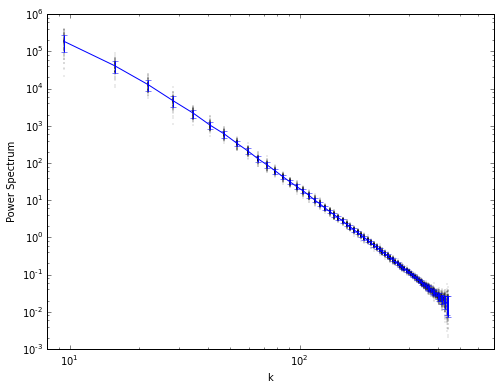

In [67]:
fir = figure(figsize=(8,6))
for i in range(N):
    scatter(k[:],PowerSpect[i,:], s=0.01)
errorbar(k,PowerAverage, sqrt(ErrorBar))
xlabel('k')
ylabel('Power Spectrum')

xscale('log')
yscale('log')
xlim(8,700)